In [2]:
#On importe les modules nécessaires au traitement de la base

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.preprocessing

In [3]:
# Charger le fichier CSV
url_path = 'https://www.data.gouv.fr/fr/datasets/r/164c9e57-32a7-4f5b-8891-26af10f91072'
# Charger le fichier CSV dans un DataFrame pandas
df = pd.read_csv(url_path, sep='\t',low_memory=True)  # Assurez-vous de spécifier le bon séparateur s'il est différent de la virgule


C:\Users\luneb\AppData\Local\Temp\ipykernel_15624\3597449632.py:4: DtypeWarning: Columns (0,9,10,12,13,14,15,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,42,43,44,45,46,47,48,49,50,51,52,53,54,65,70) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(url_path, sep='\t',low_memory=True)  # Assurez-vous de spécifier le bon séparateur s'il est différent de la virgule


In [3]:
# Afficher les premières lignes du DataFrame pour voir les données
print(df.head())
#On vérifie que la base est bien chargée
#on affiche 5 lignes aléatoires 
print(df.sample(5))

#on veut connaître le format de la base 
print ("Le dataset compte {} lignes et {} variables".format(df.shape[0], df.shape[1]))

                     code                                                url  \
0       00000000000000225  http://world-fr.openfoodfacts.org/produit/0000...   
1  0000000000000207025004  http://world-fr.openfoodfacts.org/produit/0000...   
2    00000000000003429145  http://world-fr.openfoodfacts.org/produit/0000...   
3    00000000000026772226  http://world-fr.openfoodfacts.org/produit/0000...   
4           0000000000017  http://world-fr.openfoodfacts.org/produit/0000...   

          creator   created_t      created_datetime  last_modified_t  \
0  nutrinet-sante  1623855208  2021-06-16T14:53:28Z       1692101569   
1         kiliweb  1656948610  2022-07-04T15:30:10Z       1656948613   
2         kiliweb  1630483911  2021-09-01T08:11:51Z       1682646029   
3         kiliweb  1654250311  2022-06-03T09:58:31Z       1654270474   
4         kiliweb  1529059080  2018-06-15T10:38:00Z       1561463718   

  last_modified_datetime last_modified_by      product_name  \
0   2023-08-15T12:12:49

In [4]:
#On vérifie que la base est bien chargée en affichant les premières lignes et un extrait aléatoire
df.sample(5)
print(df.head())


#On affiche la taille du dataframe
print ("Le dataset compte {} lignes et {} variables".format(df.shape[0], df.shape[1]))

# On affiche  les noms des colonnes du DataFrame
print(df.columns)
for column_name in df.columns:
    print(column_name)

#on veut connaître les valeurs de la colonne countries_fr pour ensuite extraire uniquement les valeurs venant de France
valeurs_uniques = df['countries_tags'].unique()
print(valeurs_uniques)





code
url
creator
created_t
created_datetime
last_modified_t
last_modified_datetime
last_modified_by
product_name
abbreviated_product_name
generic_name
quantity
packaging
packaging_tags
packaging_fr
packaging_text
brands
brands_tags
categories
categories_tags
categories_fr
origins
origins_tags
origins_fr
manufacturing_places
manufacturing_places_tags
labels
labels_tags
labels_fr
emb_codes
emb_codes_tags
first_packaging_code_geo
cities
cities_tags
purchase_places
stores
countries
countries_tags
countries_fr
ingredients_text
ingredients_tags
ingredients_analysis_tags
allergens
allergens_fr
traces
traces_tags
traces_fr
serving_size
serving_quantity
no_nutrition_data
additives_n
additives
additives_tags
additives_fr
nutriscore_score
nutriscore_grade
nova_group
pnns_groups_1
pnns_groups_2
food_groups
food_groups_tags
food_groups_fr
states
states_tags
states_fr
brand_owner
ecoscore_score
ecoscore_grade
nutrient_levels_tags
product_quantity
owner
data_quality_errors_tags
unique_scans_n
popular

In [5]:
name_values_first_100 = df['countries_tags'].iloc[:100]
print("Les 100 premières valeurs dans la colonne 'Name':")
print(name_values_first_100)


Les 100 premières valeurs dans la colonne 'Name':
0      en:france
1     en:germany
2       en:spain
3      en:france
4      en:france
         ...    
95     en:france
96     en:france
97     en:france
98     en:france
99     en:france
Name: countries_tags, Length: 100, dtype: object


In [6]:
# On conserve uniquement les produits vendus en France en excluant les valeurs nulles
df_france = df[df['countries_tags'].str.lower().str.contains('en:france') & df['countries_tags'].notna()]

#on regarde combien de lignes il reste dans la base
print ("Le dataset France compte {} lignes et {} variables".format(df_france.shape[0], df.shape[1]))



Le dataset France compte 1012935 lignes et 203 variables


In [8]:
#On calcule le taux de remplissage des variables
def null_factor(df):
  null_rate = ((df.isnull().sum() / df.shape[0])*100).sort_values(ascending=False).reset_index()
  null_rate.columns = ['Variable','Taux_de_Null']
  return null_rate


/tmp/ipykernel_238252/2917474816.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Taux_de_Null", y="Variable", data=filling_features, palette="flare")


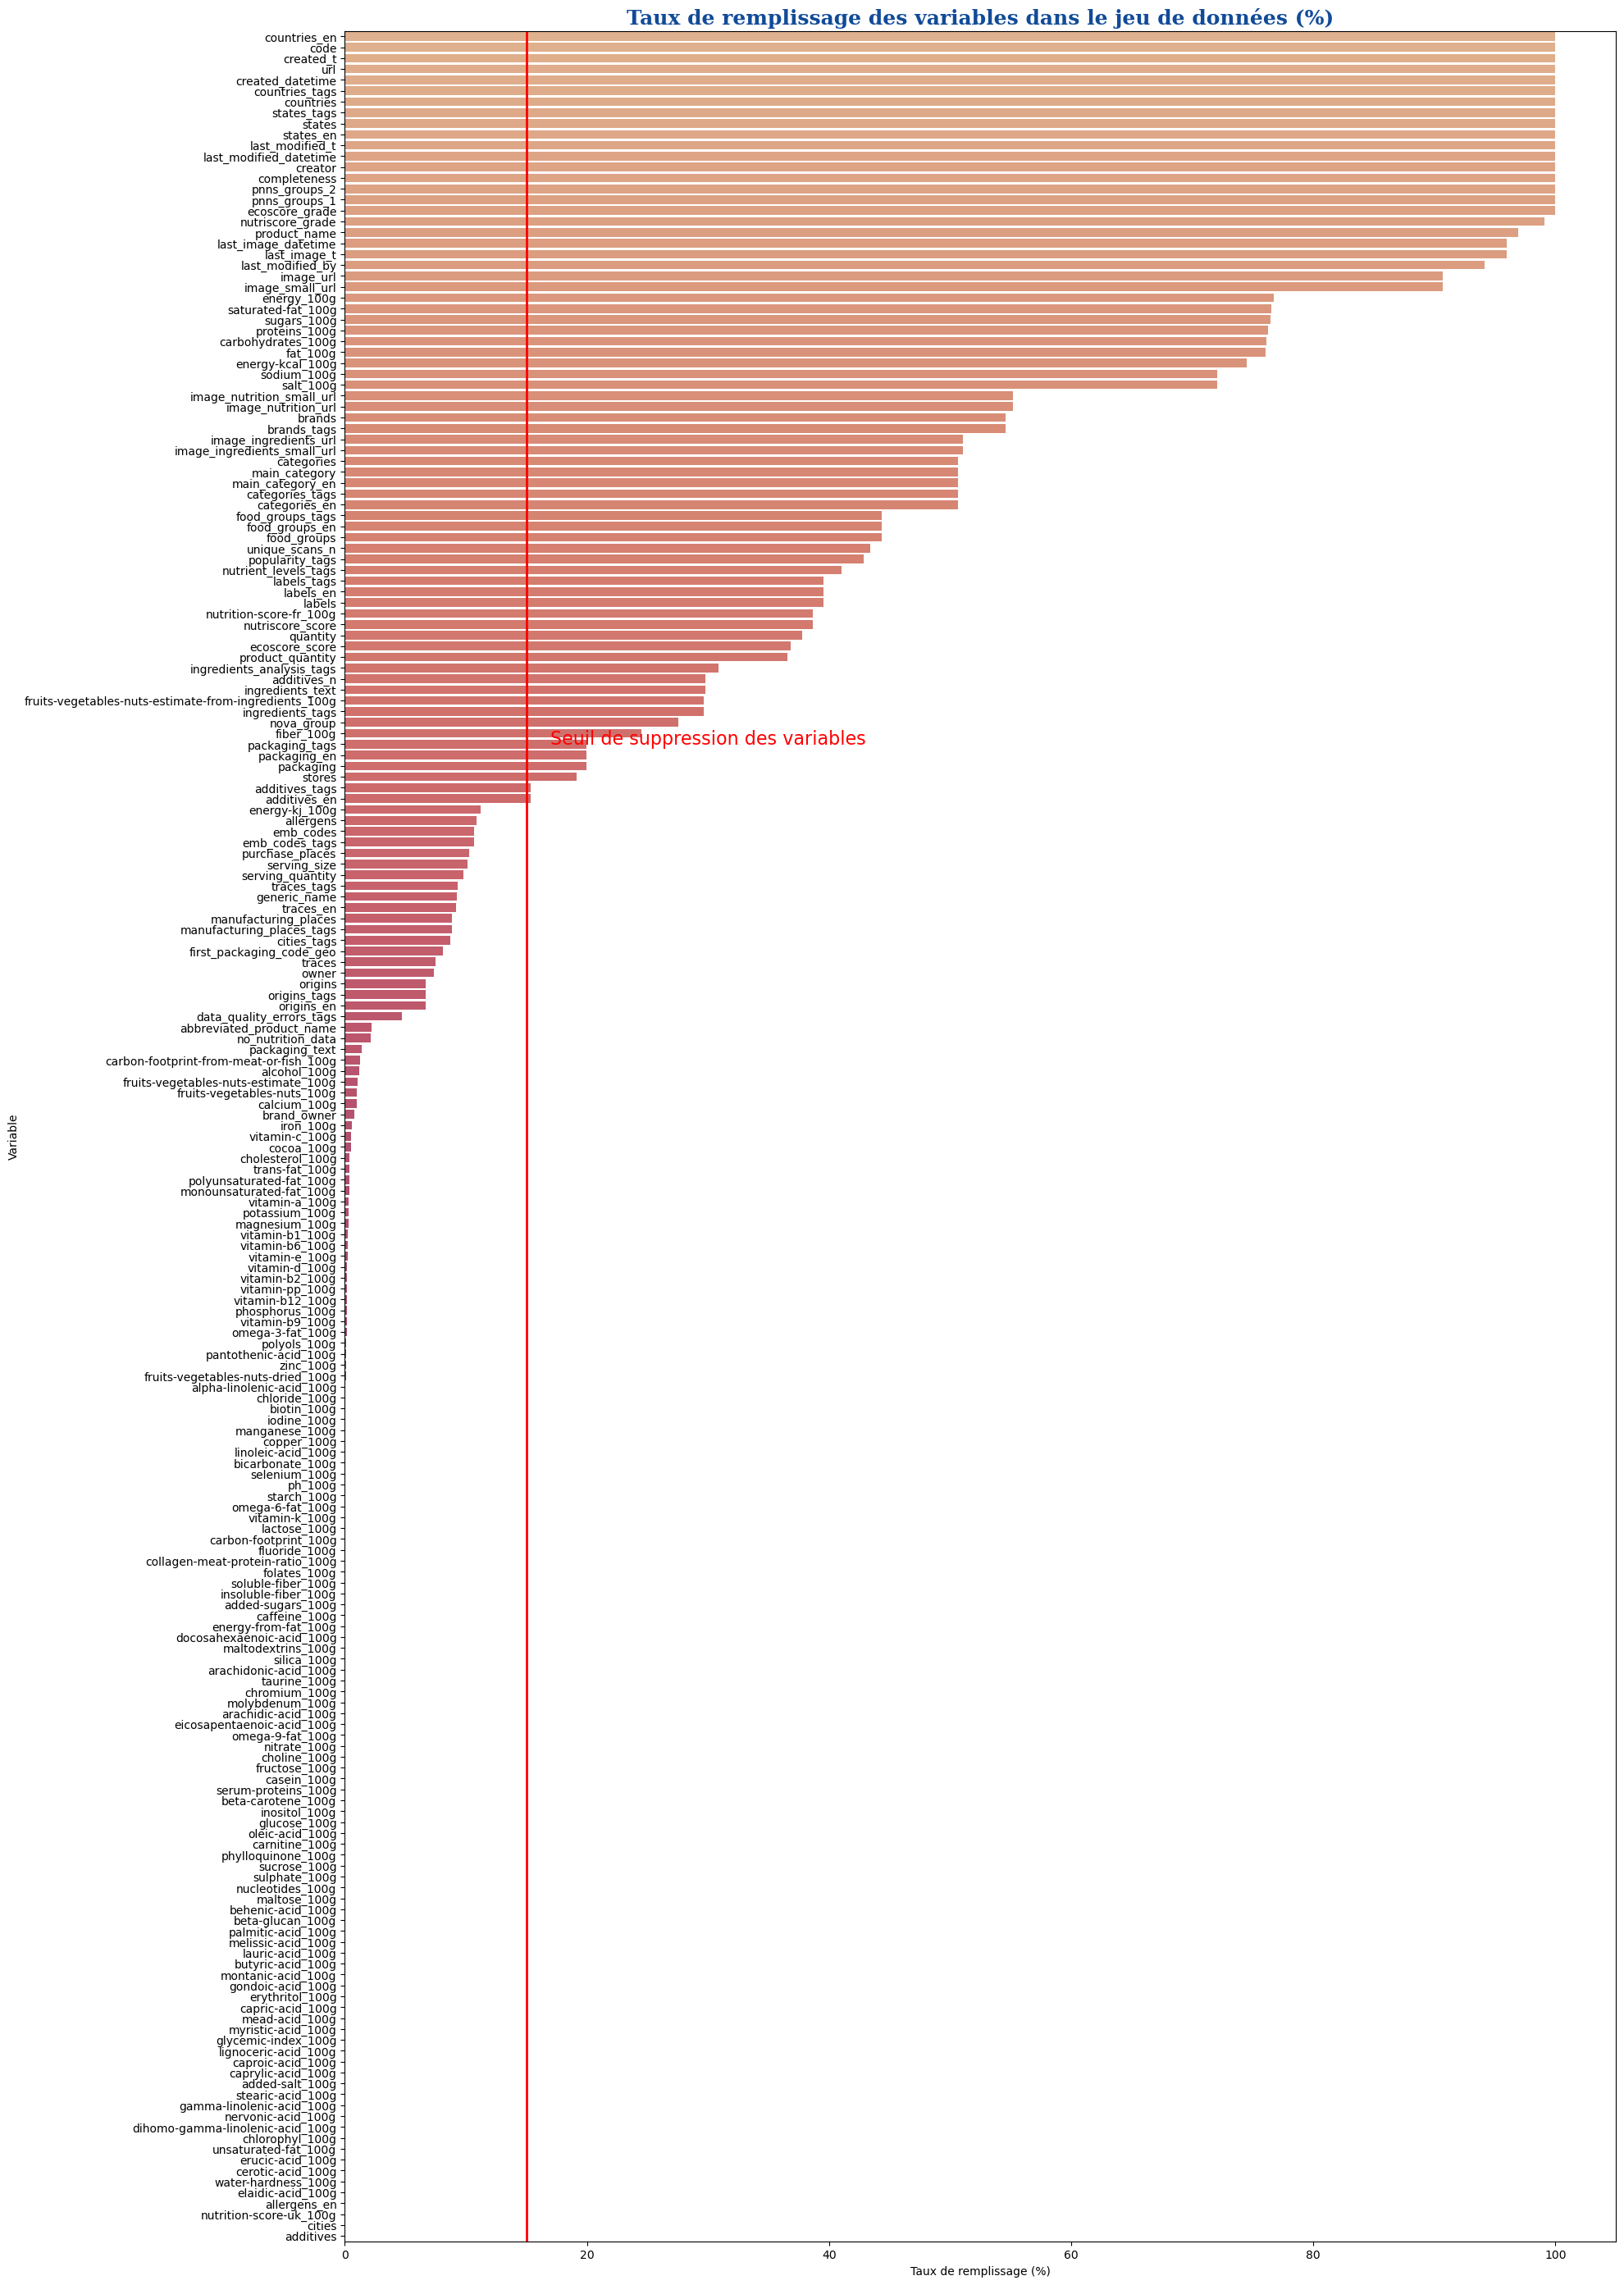

In [9]:
#Nous alllons désormais commencer à nettoyer la base de données en enlevant les colonnes peu remplis. 

filling_features = null_factor(df_france)
filling_features["Taux_de_Null"] = 100-filling_features["Taux_de_Null"]
filling_features = filling_features.sort_values("Taux_de_Null", ascending=False) 

#Seuil de suppression
sup_threshold = 15

#On affiche le taux de remplissages des variables en fonction d'un seuil de référence
fig = plt.figure(figsize=(20, 35))

font_title = {'family': 'serif',
              'color':  '#114b98',
              'weight': 'bold',
              'size': 18,
             }

sns.barplot(x="Taux_de_Null", y="Variable", data=filling_features, palette="flare")
#Seuil pour suppression des varaibles
plt.axvline(x=sup_threshold, linewidth=2, color = 'r')
plt.text(sup_threshold+2, 65, 'Seuil de suppression des variables', fontsize = 16, color = 'r')

plt.title("Taux de remplissage des variables dans le jeu de données (%)", fontdict=font_title)
plt.xlabel("Taux de remplissage (%)")
plt.show()

In [12]:
#On ne décide de ne garder que les colonnes remplis à plus de 25%
seuil = 25
variable_conserve = list(filling_features.loc[filling_features['Taux_de_Null'] >= seuil, 'Variable'].values)

#Nouveau Dataset avec les variables conservées
df_france_cleaned = df_france[variable_conserve]

# Affichage du résultat
print ("Le dataset France_cleaned compte {} lignes et {} variables".format(df_france_cleaned.shape[0], df_france_cleaned.shape[1]))

for column_name in df_france_cleaned.columns:
    print(column_name)


Le dataset France_cleaned compte 1014062 lignes et 64 variables
countries_en
code
created_t
url
created_datetime
countries_tags
countries
states_tags
states
states_en
last_modified_t
last_modified_datetime
creator
completeness
pnns_groups_2
pnns_groups_1
ecoscore_grade
nutriscore_grade
product_name
last_image_datetime
last_image_t
last_modified_by
image_url
image_small_url
energy_100g
saturated-fat_100g
sugars_100g
proteins_100g
carbohydrates_100g
fat_100g
energy-kcal_100g
sodium_100g
salt_100g
image_nutrition_small_url
image_nutrition_url
brands
brands_tags
image_ingredients_url
image_ingredients_small_url
categories
main_category
main_category_en
categories_tags
categories_en
food_groups_tags
food_groups_en
food_groups
unique_scans_n
popularity_tags
nutrient_levels_tags
labels_tags
labels_en
labels
nutrition-score-fr_100g
nutriscore_score
quantity
ecoscore_score
product_quantity
ingredients_analysis_tags
additives_n
ingredients_text
fruits-vegetables-nuts-estimate-from-ingredients_10

In [13]:
#On supprime les variables inutiles pour le reste du projet pour alléger la base

colonne_supprimer = [col for col in df_france_cleaned.columns if 'url' in col or 'image' in col or "categories" in col or "last" in col or "states" in col]
df_france_cleaned = df_france_cleaned.drop(columns=colonne_supprimer)


print ("Le dataset France_cleaned compte {} lignes et {} variables".format(df_france_cleaned.shape[0], df_france_cleaned.shape[1]))

for column_name in df_france_cleaned.columns:
    print(column_name)




Le dataset France_cleaned compte 1014062 lignes et 46 variables
countries_en
code
created_t
created_datetime
countries_tags
countries
creator
completeness
pnns_groups_2
pnns_groups_1
ecoscore_grade
nutriscore_grade
product_name
energy_100g
saturated-fat_100g
sugars_100g
proteins_100g
carbohydrates_100g
fat_100g
energy-kcal_100g
sodium_100g
salt_100g
brands
brands_tags
main_category
main_category_en
food_groups_tags
food_groups_en
food_groups
unique_scans_n
popularity_tags
nutrient_levels_tags
labels_tags
labels_en
labels
nutrition-score-fr_100g
nutriscore_score
quantity
ecoscore_score
product_quantity
ingredients_analysis_tags
additives_n
ingredients_text
fruits-vegetables-nuts-estimate-from-ingredients_100g
ingredients_tags
nova_group


In [27]:
#On ne garde que les variables où le nutriscore est complété



df_france_cleaned = df_france_cleaned[(df_france_cleaned['nutriscore_grade'].notnull()) & (df_france_cleaned['nutriscore_grade'] != "unknown") & (df_france_cleaned['nutriscore_grade'] != "not-applicable")]
print ("Le dataset France compte {} lignes et {} variables".format(df_france_cleaned.shape[0], df_france_cleaned.shape[1]))



print(df_france_cleaned.describe())


Le dataset France compte 392149 lignes et 46 variables
          created_t   completeness   energy_100g  saturated-fat_100g  \
count  3.921490e+05  392148.000000  3.904220e+05       390309.000000   
mean   1.537158e+09       0.670290  1.164168e+03            5.742925   
std    6.559800e+07       0.201446  2.360556e+03            8.395052   
min    1.328021e+09       0.200000  0.000000e+00            0.000000   
25%    1.506780e+09       0.475000  4.980000e+02            0.300000   
50%    1.529415e+09       0.675000  1.071000e+03            2.300000   
75%    1.572975e+09       0.800000  1.669000e+03            8.500000   
max    1.701724e+09       1.100000  1.390000e+06          202.000000   

         sugars_100g  proteins_100g  carbohydrates_100g       fat_100g  \
count  390299.000000  390415.000000       390278.000000  390412.000000   
mean       12.403211       9.255997           25.010684      15.131158   
std        18.831994       9.654280           26.960590      18.683205   


/tmp/ipykernel_238252/3363886904.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Taux_de_Null", y="Variable", data=filling_features, palette="flare")


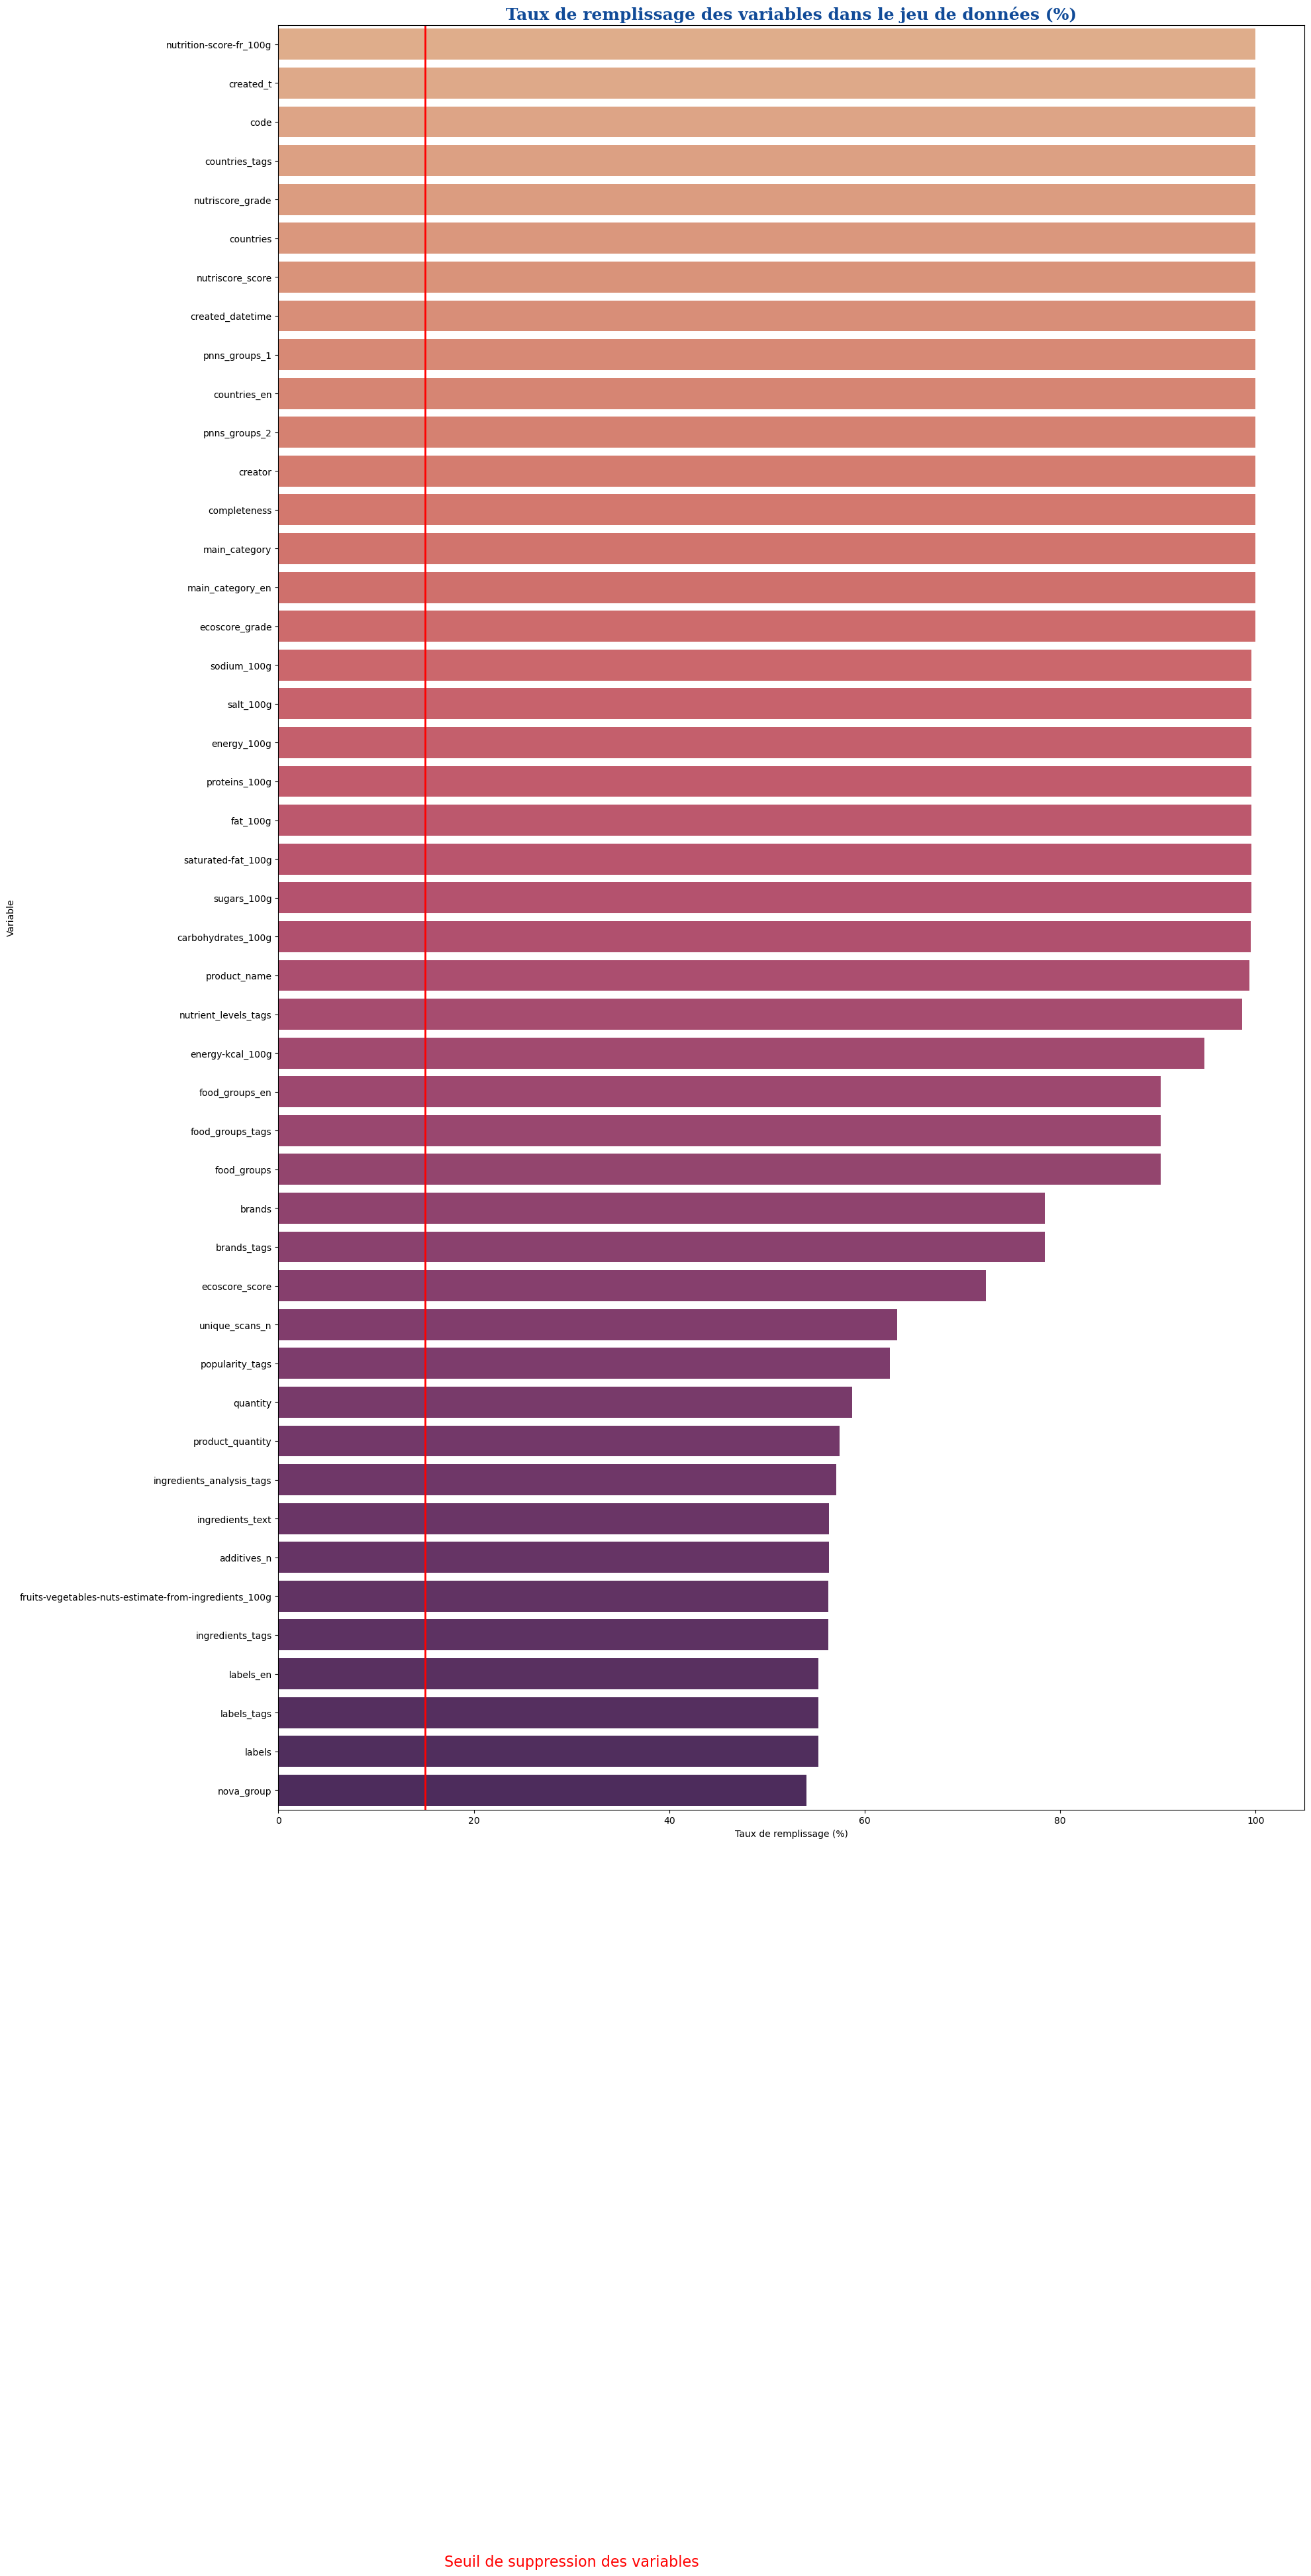

In [33]:
#On affiche les caractéristiques de la base construite

filling_features = null_factor(df_france_cleaned)
filling_features["Taux_de_Null"] = 100-filling_features["Taux_de_Null"]
filling_features = filling_features.sort_values("Taux_de_Null", ascending=False) 

#Seuil de suppression
sup_threshold = 15

#On affiche le taux de remplissages des variables en fonction d'un seuil de référence
fig = plt.figure(figsize=(20, 35))

font_title = {'family': 'serif',
              'color':  '#114b98',
              'weight': 'bold',
              'size': 18,
             }

sns.barplot(x="Taux_de_Null", y="Variable", data=filling_features, palette="flare")
#Seuil pour suppression des varaibles
plt.axvline(x=sup_threshold, linewidth=2, color = 'r')
plt.text(sup_threshold+2, 65, 'Seuil de suppression des variables', fontsize = 16, color = 'r')

plt.title("Taux de remplissage des variables dans le jeu de données (%)", fontdict=font_title)
plt.xlabel("Taux de remplissage (%)")
plt.show()

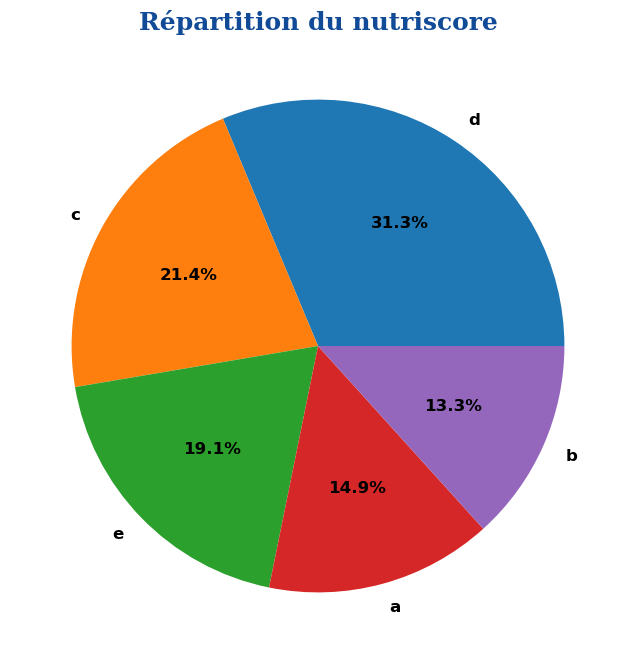

In [52]:
nutriscore = df_france_cleaned.groupby(by='nutriscore_grade')['code'].nunique().sort_values(ascending=False)
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(aspect="equal"))

explodes = np.zeros(len(nutriscore))

plt.pie(nutriscore, labels=nutriscore.index,
        startangle=0,
        explode=explodes,
        autopct='%1.1f%%',
        textprops=dict(color="black", size=12, weight="bold"))
plt.title("Répartition du nutriscore", fontdict=font_title)
plt.show()


In [31]:
#analyse des corrélations

sns.pairplot(df_france_cleaned.sample(frac=0.05), hue="nutriscore_grade")


In [56]:
# Import the necessary modules
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer

# Define the features and target variable
features = ["salt_100g", "energy_100g","fat_100g", "saturated-fat_100g","sugars_100g", "sodium_100g", "proteins_100g", "carbohydrates_100g"]
target = "nutrition-score-fr_100g"

# Extract features and target variable
X = df_france_cleaned[features]
y = df_france_cleaned[target]

# Create an imputer to handle missing values (NaN) using the mean
imputer = SimpleImputer(strategy='mean')

# Fit and transform the imputer on the features
X_imputed = imputer.fit_transform(X)

# Create a linear regression model
reg = LinearRegression()

# Fit the model on the imputed features and target variable
reg.fit(X_imputed, y)

# Determine the coefficients
coefficients = reg.coef_
intercept = reg.intercept_

# Calculate the prediction
y_pred = reg.predict(X_imputed)

# Calculate R2
r2 = r2_score(y, y_pred)

# Print the results
print("Coefficients:", coefficients)
print("Intercept:", intercept)
print("R2:", r2)


Coefficients: [9.36413690e-02 7.28748931e-08 9.91951469e-02 4.28670123e-01
 2.02482149e-01 1.70403715e-01 9.09971224e-02 4.55944509e-03]
Intercept: 1.637790701562139
R2: 0.5196459645456625


In [60]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Define your features (X) and target variable (y)
X = df_france_cleaned[["fat_100g", "salt_100g", "energy_100g", "sugars_100g", "sodium_100g", "proteins_100g", "carbohydrates_100g"]]
y = df_france_cleaned["nutrition-score-fr_100g"]


# Create an imputer to handle missing values (NaN) using the mean

X_imputed = imputer.fit_transform(X)

imputer = SimpleImputer(strategy='mean')

#Create and train the model
reg = RandomForestRegressor(n_estimators=100, random_state=42)
reg.fit(X_imputed, y)

# Make predictions
y_pred = reg.predict(X_imputed)

# Evaluate the model
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)
print("Mean Squared Error:", mse)
print("R2 Score:", r2)


Mean Squared Error: 1.946077777951207
R2 Score: 0.9748763567732368
